<a href="https://colab.research.google.com/github/HazarKnt/Kalp-Hastal-/blob/main/Heart_Failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split # Model seçimi,eğitim ve test verilerini ayırmak için kütüphane importu
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier #sınıflandırma algoritmaları
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm #SVM(Support Vector Machine)
from sklearn import tree #Decision Tree
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve, auc #performans metrikleri
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
#from sklearn.metrics import plot_confusion_matrix
# karmaşıklıkları kullanarak değerlendirme metriclerini hesaplamak
import seaborn as sn # görselleştirmek için kullanılan kütüphane

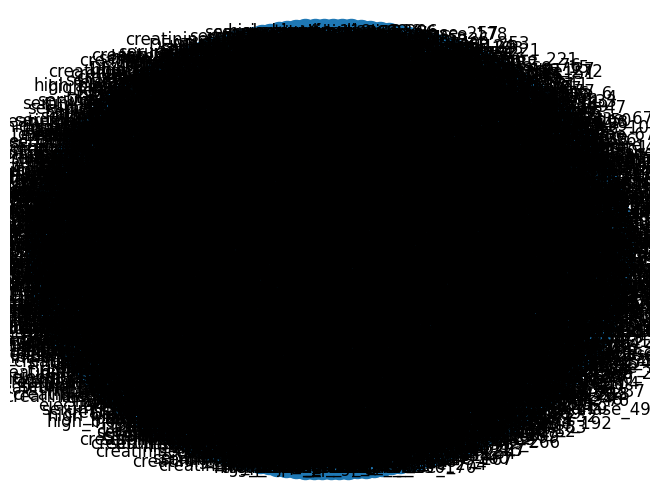

In [31]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Veri setini yükleme
heart_data = pd.read_excel('heart.xlsx')

# Kenarlı ve düğümlü graf oluşturma
G = nx.Graph()

# Düğümleri ekleme
for column in heart_data.columns:
    for idx, value in enumerate(heart_data[column]):
        G.add_node(f"{column}_{idx}", feature=column, value=value)

# Kenarları ekleme (örneğin, benzer özelliklere sahip hastalar arasında kenarlar oluşturabilirsiniz)
for i in range(len(heart_data)):
    for j in range(i+1, len(heart_data)):
        similarity = sum(heart_data.iloc[i] == heart_data.iloc[j]) / len(heart_data.columns)
        if similarity > 0.8:  # Örnek bir benzerlik eşiği belirleyin
            G.add_edge(f"patient_{i}", f"patient_{j}", similarity=similarity)

# Grafı çizdirme
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True)
edge_labels = nx.get_edge_attributes(G, 'similarity')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.show()


In [32]:
# Pandas DataFrame ile dataset dosyasını yükleme işlemi
heart_data = pd.read_excel('/content/heart.xlsx')

In [33]:
# Dataset'in ilk 5 satırını yazdırma
heart_data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [34]:
# Dataset'in son 5 satırını yazdırma
heart_data.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [35]:
# Dataset içerisinde kaç adet satır ve sütun bulunduğunu yazdırma
heart_data.shape

(299, 13)

In [36]:
# Dataset hakkında bilgi alma
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [37]:
# Dataset içerisinde Null değer olup olmadığını kontrol etme. Boş olan değerlerin toplamı.
heart_data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


In [38]:
# veriler ile ilgili istatistiksel ölçümlerin yapılması.
heart_data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [39]:
# Hedef Değişken dağılımının kontrol edilmesi
heart_data['DEATH_EVENT'].value_counts()

,count
DEATH_EVENT,
0,203
1,96


In [40]:
X = heart_data.drop(columns='DEATH_EVENT', axis=1)#death event alanını çıkart.
# etiket alanı hastanın durumunu belirtiyor ve yapay zeka ezberlemesin diye bu sütünu verisetinden çıkarıyor
Y = heart_data['DEATH_EVENT']
# etiket alanı y değişkeninde saklanıyor

In [41]:
print(X)
# Sütunun verisetinden çıkarıldıktan sonra verisetinin son durumu

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

In [42]:
print(Y)
#etiket verisi 0 mı 1 mi

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64


In [43]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)#x bize 12 tane feature tutar. Y ise death eventi tutar.
# eğitim ve test olarak verileri ayırıyoruz %80 train %20 test olarak ayırdık

In [44]:
print(X.shape, X_train.shape, X_test.shape)# kaçını test için kaçını eğitim için kullandığımızı belirtiyor.
#x train ve x test te kaç adet verinin olduğunu gösteriyoruz

(299, 12) (239, 12) (60, 12)


In [45]:
#model = LogisticRegression()
#model= KNeighborsClassifier(n_neighbors=5)
#model=GaussianNB()
#model=svm.SVC()
#model=tree.DecisionTreeClassifier()
model=RandomForestClassifier()
# Kullanılacak modelin seçilmesi. (Sistemi akıllı hale getirmek.)

In [46]:
# Sınıflandırma modellerinin training ile eğitimi
score=model.fit(X_train, Y_train)

In [47]:
# Eğitim verilerinin doğruluğu ve eğitim datası üzerinde değerlendirme metricleri hesaplanması
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
training_f1_score=f1_score(X_train_prediction, Y_train)
training_precision_score=precision_score(X_train_prediction, Y_train)
training_recall_score=recall_score(X_train_prediction, Y_train)

In [48]:
print('Accuracy on Training data : ', training_data_accuracy)
print('F1-score on Training data : ', training_f1_score)
print('Precision on Training data : ', training_precision_score)
print('Recall on Training data : ', training_recall_score)
# Değerlerin yazdırma işlemi

Accuracy on Training data :  1.0
F1-score on Training data :  1.0
Precision on Training data :  1.0
Recall on Training data :  1.0


In [49]:
# Test verilerinin doğruluğu ve test datası üzerinde değerlendirme metricleri hesaplanması
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
test_f1_score=f1_score(X_test_prediction, Y_test)
test_precision_score=precision_score(X_test_prediction, Y_test)
test_recall_score=recall_score(X_test_prediction, Y_test)

In [50]:
print('Accuracy on Test data : ', test_data_accuracy)
print('F1-score on Test data : ', test_f1_score)
print('Precision on Test data : ', test_precision_score)
print('Recall on Test data : ', test_recall_score)
# Değerlerin yazdırma işlemi

Accuracy on Test data :  0.8833333333333333
F1-score on Test data :  0.8
Precision on Test data :  0.7368421052631579
Recall on Test data :  0.875


In [51]:
y_true=Y_test
y_pred=model.predict(X_test)
# Tahmin kısmı: gerçek çıkış ve tahmininin ne olduğu

In [52]:
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)
#confusion_matrix hesaplanması

[[39  2]
 [ 5 14]]


<Axes: >

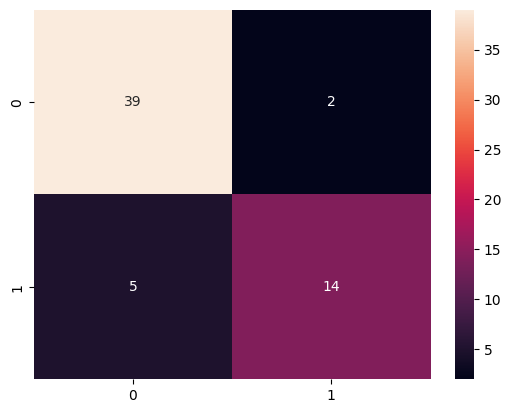

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(cf_matrix, annot=True)
#görselleştirme heatmap ısı haritası

In [54]:
!pip install matplotlib==3.1.0 #eski version

  Using cached matplotlib-3.1.0.tar.gz (37.2 MB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


<Axes: >

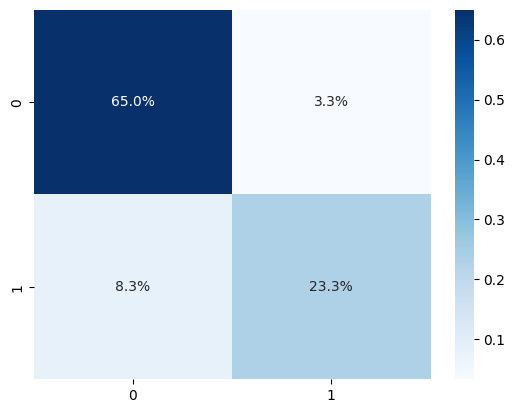

In [55]:
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.1%', cmap='Blues')
# Heatmap'in yüzdelik gösterimi

In [70]:
input_data = (67,0,582,0,50,0,263358,1.18,137,1,1,76)

# giriş verilerini numpy dizisine aktarma
input_data_as_numpy_array= np.asarray(input_data)#tek boyutlu diziye dönüştürmek

# numpy dizisini yalnızca örnek için tahmin ettiğimiz gibi yeniden şekillendirme
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('Kişinin kalp hastalığı yok')
else:
  print('Kişi kalp hastası')

[0]
Kişinin kalp hastalığı yok


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
